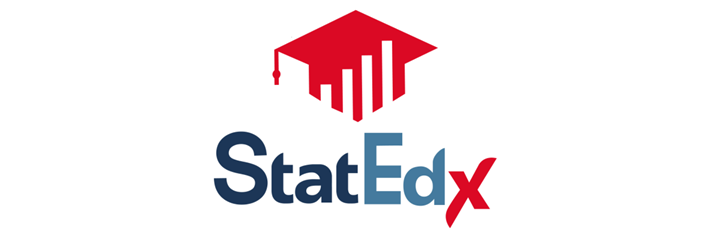

**<h2><font color="#043b80" size=8>Curso: Machine Learning con Python</font></h2>**
<h1><font color="#004D7F" size=6>Sesión 4: Entrenamiento de Modelos de Regresión</font></h1>
<div style="text-align: right">
<font color="#004D7F" size=5>Docente: Luis Bautista</font><br>

# **Modelos predictivos bajo el enfoque de regresión**

La regresión lineal es el algoritmo más simple en el aprendizaje automático, se puede entrenar de diferentes maneras. En este Notebook cubriremos los siguientes algoritmos lineales:

1. Regresión lineal
2. Regresión de Ridge
3. Regresión LASSO
4. Elastic Net
5. Regresión polinomial
6. Descenso de gradiente estocástico
7. Random Forest
8. Máquina de Vectores de Soporte
9. KNN
10. XGBoost
11. LGBM

Vamos a utilizar el conjunto de datos `USA_Housing`. Dado que el precio de la vivienda es una variable continua, se trata de un problema de regresión.

Los datos contienen las siguientes columnas:



* '`Avg. Area Income`': Promedio de ingresos de los residentes de la ciudad donde se ubica la casa.
* '`Avg. Area House Age`': Edad promedio de las casas en la misma ciudad.
* '`Avg. Area Number of Rooms`': Número promedio de habitaciones para casas en la misma ciudad.
* '`Avg. Area Number of Bedrooms`': Número medio de dormitorios para casas en la misma ciudad.
* '`Area Population`': La población de la ciudad donde se encuentra la vivienda.
* '`Price`': Precio al que se vendió la casa.
* '`Address`': Dirección de la casa.


# Importando librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings('ignore')

### Cargando la data

In [ ]:
USAhousing = pd.read_csv('USA_Housing.csv')
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
USAhousing.info()

In [ ]:
USAhousing.describe()

In [ ]:
USAhousing.columns

# Análisis exploratorio

In [ ]:
# Matriz de correlaciones
corr_matrix = USAhousing.corr(method='pearson')
corr_matrix

In [ ]:
#Gráfico de la matriz de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
# Histograma de la variabe 'precio'
sns.histplot(USAhousing['Price'], kde=True, stat="density")

In [ ]:
#Definimos algunas funciones para calcular las métricas
#------------------------------------------------------
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

## Entrenamiento de un modelo de regresión lineal

Primero necesitaremos dividir nuestros datos en una matriz **X** que contiene las características para entrenar y una matriz **Y** con la variable de destino, en este caso la columna Precio. Desecharemos la columna Dirección porque solo tiene información de texto que el modelo de regresión lineal no puede usar.




### Matrices *X* e *Y*

In [ ]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

y = USAhousing['Price']

## Data de entrenamiento y prueba

Ahora dividamos los datos en un conjunto de entrenamiento y un conjunto de prueba. Entrenaremos el modelo en el conjunto de entrenamiento y luego usaremos el conjunto de prueba para evaluar el modelo.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Normalizando los datos
 La regresión lineal a menudo hará predicciones más confiables si reescala las variables de entrada usando la estandarización o la normalización.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# 1. Regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Calculando las métricas de la regresión lineal
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.56609336878
MSE: 10068422551.40088
RMSE: 100341.52954485436
R2 Square 0.9146818498754016
Train set evaluation:
_____________________________________
MAE: 81480.49973174892
MSE: 10287043161.197224
RMSE: 101425.06180031257
R2 Square 0.9192986579075526


In [ ]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379


In [ ]:
# Comparación: Valores reales vs Valores predichos
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="y", label="Actual", linewidth=2)
plt.plot(test_pred, c="r", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

# 2. Regresión de Ridge

Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

Para la estimación de los coeficientes en mínimos cuadrados debemos minimizar la suma de los errores al cuadrado. Para generar una regresión tipo rigde agregamos la penalización y mínimizamos la expresión:

\begin{equation}
\sum_{i=1}^n{(y_i - \beta_o - \sum_{j=1}^p{\beta_jx_{ij}})^2} + \lambda\sum_{j=1}^p{\beta_{j}^2}
\end{equation}

Donde la primera expresión es la suma de los errores al cuadrado y es un parámetro que debe ser tuneado.

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81428.64835535336
MSE: 10153269900.892609
RMSE: 100763.43533689494
R2 Square 0.9139628674464607
Train set evaluation:
_____________________________________
MAE: 81972.39058585507
MSE: 10382929615.143456
RMSE: 101896.66145239232
R2 Square 0.9185464334441484


In [ ]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379


# 3. Regressión LASSO

A diferencia de Ridge, matemáticamente el único cambio es que ahora los coeficientes de la penalización están en valor absoluto en vez de elevados al cuadrado. Esto tiene efectos distintos a la ridge:  

- No penaliza de la misma manera a los coeficientes muy grandes.
- En la regresión Ridge los coeficientes tienden hacia cero, en la regresión Lasso los coeficientes puede volverse cero, lo que implica que la regresión Lasso tiene otro efecto y es que automáticamente depura las variables que no agregan poder predictivo al modelo.

\begin{equation}
\sum_{i=1}^n{(y_i - \beta_o - \sum_{j=1}^p{\beta_jx_{ij}})^2} + \lambda\sum_{j=1}^p{|\beta_{j}|}
\end{equation}

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1,
              precompute=True,
              positive=True,
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.6985172622
MSE: 10068453390.364523
RMSE: 100341.68321472648
R2 Square 0.914681588551116
Train set evaluation:
_____________________________________
MAE: 81480.63002185506
MSE: 10287043196.634295
RMSE: 101425.0619750084
R2 Square 0.9192986576295505


In [ ]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
2,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379


# 4. Elastic Net

Es una combinación de Ridge y Lasso. Se decide entonces qué peso se le da a cada método de penalización y se implementa la regresión:


\begin{equation}
\sum_{i=1}^n{(y_i - \beta_o - \sum_{j=1}^p{\beta_jx_{ij}})^2} + \lambda_{1}\sum_{j=1}^p{\beta_{j}^2} +\lambda_{2}\sum_{j=1}^p{|\beta_{j}|}
\end{equation}

In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81184.43147330944
MSE: 10078050168.470106
RMSE: 100389.49232100991
R2 Square 0.9146002670381437
Train set evaluation:
_____________________________________
MAE: 81577.88831531754
MSE: 10299274948.10146
RMSE: 101485.34351373828
R2 Square 0.9192027001474953


In [ ]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
2,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
3,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545


# 5. Regresión polinomial

Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

La Regresión Polinomial es un caso especial de la Regresión Lineal, enriquece el modelo lineal al aumentar predictores adicionales, obtenidos al elevar cada uno de los predictores originales a una potencia. Por ejemplo, una regresión cúbica utiliza tres variables, como predictores. Este enfoque proporciona una forma sencilla de proporcionar un ajuste no lineal a los datos.

\begin{equation}
y_i = \beta_0 + \beta_1x_i + \beta_2x^2_i + \beta_3x^3_i + \epsilon_i
\end{equation}


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81174.51844119695
MSE: 10081983997.620695
RMSE: 100409.08324260656
R2 Square 0.914566932419506
Train set evaluation:
_____________________________________
MAE: 81363.0618562117
MSE: 10266487151.007814
RMSE: 101323.67517519198
R2 Square 0.9194599187853729


In [ ]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
2,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
3,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
4,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000


# 6. Descenso de gradiente estocástico

Es un algoritmo de optimización muy genérico capaz de encontrar soluciones óptimas a una amplia gama de problemas. La idea general es ajustar los parámetros de forma iterativa para minimizar una función de coste.



In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.56550948921
MSE: 10068422554.63108
RMSE: 100341.5295609504
R2 Square 0.9146818498480294
Train set evaluation:
_____________________________________
MAE: 81480.49897356698
MSE: 10287043161.203398
RMSE: 101425.061800343
R2 Square 0.9192986579075041


In [ ]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
2,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
3,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
4,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
5,Stochastic Gradient Descent,81135.565509,1.006842e+10,100341.529561,0.914682,0.000000


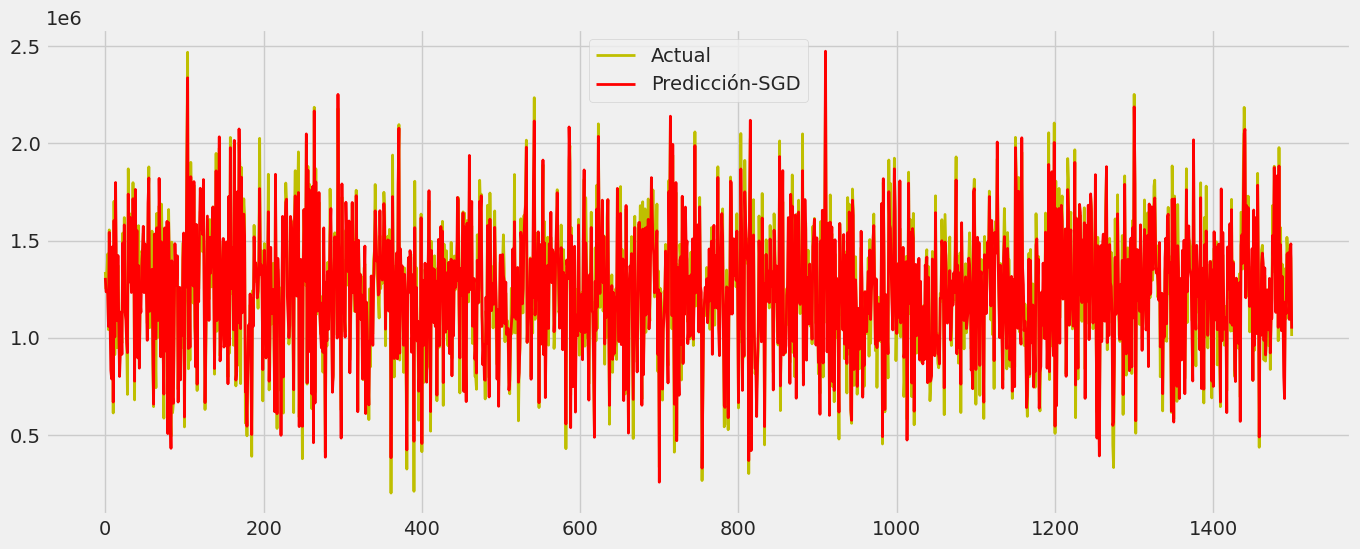

In [ ]:
# Comparación: Valores reales vs Valores predichos
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="y", label="Actual", linewidth=2)
plt.plot(test_pred, c="r", label="Predicción-SGD", linewidth=2)
plt.legend(loc='best')
plt.show();

# 7. Regresión usando Random Forest

- El **Random Forest** es un algoritmo de aprendizaje supervisado que utiliza un método de aprendizaje por conjuntos para clasificación y regresión.

- Los **Random Forest** es una técnica de **bagging** y no una técnica de **boosting**. Los árboles en bosques aleatorios se ejecutan en paralelo. No hay interacción entre estos árboles mientras se construyen.

- Funciona construyendo una multitud de árboles de decisión en el momento del entrenamiento y generando la clase que es el modo de las clases (clasificación) o la predicción media (regresión) de los árboles individuales.



In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 94042.35956779747
MSE: 14129490501.009958
RMSE: 118867.5334185494
R2 Square 0.8802690306654317
Train set evaluation:
_____________________________________
MAE: 35377.71454232515
MSE: 1988273913.8133569
RMSE: 44590.06519184915
R2 Square 0.9844020900099474


In [ ]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
2,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
3,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
4,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
5,Stochastic Gradient Descent,81135.565509,1.006842e+10,100341.529561,0.914682,0.000000
6,Random Forest Regressor,94042.359568,1.412949e+10,118867.533419,0.880269,0.000000


In [ ]:
# Comparación: Valores reales vs Valores predichos
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="y", label="Actual", linewidth=2)
plt.plot(test_pred, c="r", label="Predicción-RF", linewidth=2)
plt.legend(loc='best')
plt.show();

# 8. Regresión usando SVM

- Las máquinas de vectores de soporte (SVM) son bien conocidas en problemas de clasificación. Sin embargo, el uso de SVM en regresión no está tan bien documentado. Estos tipos de modelos se conocen como regresión de vectores de soporte (SVR).

- Las máquinas de vectores de soporte (SVM) son bien conocidas en problemas de clasificación. Sin embargo, el uso de SVM en regresión no está tan bien documentado. Estos tipos de modelos se conocen como regresión de vectores de soporte (SVR).

- En contraste con MCO, la función objetivo de la RVS es minimizar los coeficientes, más específicamente, la norma del vector de coeficientes, no el error al cuadrado.


In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 87205.73051021632
MSE: 11720932765.275513
RMSE: 108263.25676458987
R2 Square 0.9006787511983232
Train set evaluation:
_____________________________________
MAE: 73692.5684807321
MSE: 9363827731.411339
RMSE: 96766.87310960988
R2 Square 0.9265412370487783


In [ ]:
results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
2,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
3,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
4,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
5,Stochastic Gradient Descent,81135.565509,1.006842e+10,100341.529561,0.914682,0.000000
6,Random Forest Regressor,94042.359568,1.412949e+10,118867.533419,0.880269,0.000000
7,SVM Regressor,87205.730510,1.172093e+10,108263.256765,0.900679,0.000000


In [ ]:
# Comparación: Valores reales vs Valores predichos
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="y", label="Actual", linewidth=2)
plt.plot(test_pred, c="r", label="Predicción-SVR", linewidth=2)
plt.legend(loc='best')
plt.show();

# 9. Regresión usando KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

KNN_reg = KNeighborsRegressor(n_neighbors=5)
regressor = KNN_reg.fit(X_train, y_train)

test_pred = regressor.predict(X_test)
train_pred = regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 103907.141266507
MSE: 16669630456.738068
RMSE: 129110.92307290684
R2 Square 0.8587443041281899
Train set evaluation:
_____________________________________
MAE: 85630.18217834581
MSE: 11449187800.073023
RMSE: 107000.87756683597
R2 Square 0.9101816910013979


In [ ]:
results_df_2 = pd.DataFrame(data=[["KNN Regressor", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
2,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
3,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
4,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
5,Stochastic Gradient Descent,81135.565509,1.006842e+10,100341.529561,0.914682,0.000000
6,Random Forest Regressor,94042.359568,1.412949e+10,118867.533419,0.880269,0.000000
7,SVM Regressor,87205.730510,1.172093e+10,108263.256765,0.900679,0.000000
8,KNN Regressor,103907.141267,1.666963e+10,129110.923073,0.858744,0.000000


In [ ]:
# Comparación: Valores reales vs Valores predichos
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="y", label="Actual", linewidth=2)
plt.plot(test_pred, c="r", label="Predicción-KNN", linewidth=2)
plt.legend(loc='best')
plt.show();

# 10. XGBoost Regressor

In [ ]:
import xgboost as xg

xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 100, seed = 123)

regressor = xgb_r.fit(X_train, y_train)

test_pred = regressor.predict(X_test)
train_pred = regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 100098.94333935666
MSE: 15812853401.025711
RMSE: 125749.16858979908
R2 Square 0.8660044914206281
Train set evaluation:
_____________________________________
MAE: 31629.427822810165
MSE: 1809884318.3986166
RMSE: 42542.73520119054
R2 Square 0.9858015475158322


In [ ]:
results_df_2 = pd.DataFrame(data=[["XGBoost Regressor", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
2,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
3,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
4,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
5,Stochastic Gradient Descent,81135.565509,1.006842e+10,100341.529561,0.914682,0.000000
6,Random Forest Regressor,94042.359568,1.412949e+10,118867.533419,0.880269,0.000000
7,SVM Regressor,87205.730510,1.172093e+10,108263.256765,0.900679,0.000000
8,KNN Regressor,103907.141267,1.666963e+10,129110.923073,0.858744,0.000000
9,XGBoost Regressor,100098.943339,1.581285e+10,125749.168590,0.866004,0.000000


# 11. LGBM Regressor

In [ ]:
import lightgbm as lgb

lgbm_r = lgb.LGBMRegressor(objective ='regression')

regressor = lgbm_r.fit(X_train, y_train)

test_pred = regressor.predict(X_test)
train_pred = regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1261
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 5
[LightGBM] [Info] Start training from score 1228219.149021
Test set evaluation:
_____________________________________
MAE: 88829.38502322108
MSE: 12432580573.117994
RMSE: 111501.4823808096
R2 Square 0.894648365187468
Train set evaluation:
_____________________________________
MAE: 60573.56388247526
MSE: 5762500533.837241
RMSE: 75911.13576964344
R2 Square 0.9547934698433803


In [ ]:
results_df_2 = pd.DataFrame(data=[["LGBM Regressor", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
2,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
3,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
4,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
5,Stochastic Gradient Descent,81135.565509,1.006842e+10,100341.529561,0.914682,0.000000
6,Random Forest Regressor,94042.359568,1.412949e+10,118867.533419,0.880269,0.000000
7,SVM Regressor,87205.730510,1.172093e+10,108263.256765,0.900679,0.000000
8,KNN Regressor,103907.141267,1.666963e+10,129110.923073,0.858744,0.000000
9,XGBoost Regressor,100098.943339,1.581285e+10,125749.168590,0.866004,0.000000


# 12. ExtraTrees Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

ExtraTrees_r = ExtraTreesRegressor(n_estimators = 100,
          criterion ='squared_error', max_features = "auto")

regressor = ExtraTrees_r.fit(X_train, y_train)

test_pred = regressor.predict(X_test)
train_pred = regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 91581.95954340875
MSE: 13133708248.345356
RMSE: 114602.3919835243
R2 Square 0.8887071250432276
Train set evaluation:
_____________________________________
MAE: 1.4372484916488506e-09
MSE: 2.976733344037132e-18
RMSE: 1.725321229231569e-09
R2 Square 1.0


In [ ]:
results_df_2 = pd.DataFrame(data=[["ExtraTrees Regressor", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
2,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
3,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
4,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
5,Stochastic Gradient Descent,81135.565509,1.006842e+10,100341.529561,0.914682,0.000000
6,Random Forest Regressor,94042.359568,1.412949e+10,118867.533419,0.880269,0.000000
7,SVM Regressor,87205.730510,1.172093e+10,108263.256765,0.900679,0.000000
8,KNN Regressor,103907.141267,1.666963e+10,129110.923073,0.858744,0.000000
9,XGBoost Regressor,100098.943339,1.581285e+10,125749.168590,0.866004,0.000000


# 13. Comparación de modelos





<Axes: ylabel='Model'>

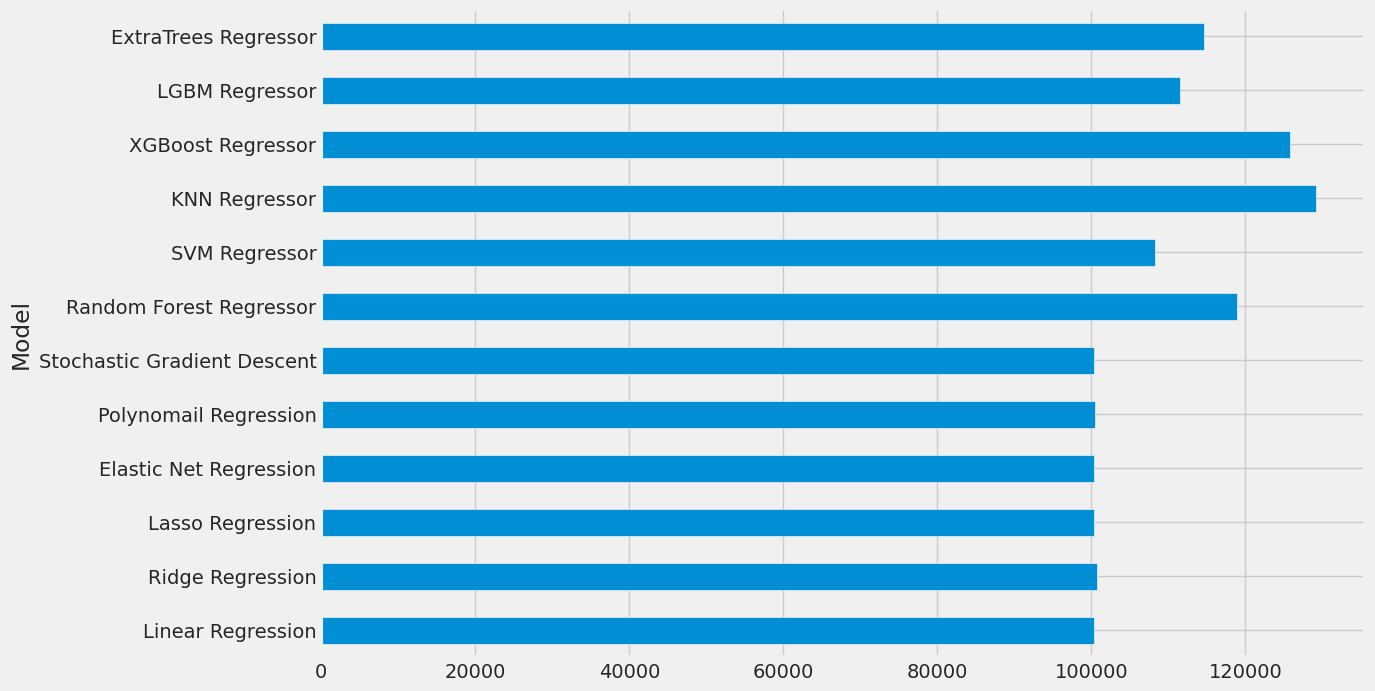

In [ ]:
results_df.set_index('Model', inplace=True)
results_df['RMSE'].plot(kind='barh', figsize=(12, 8))

# 14. Predicción

In [ ]:
# Nueva data
prueba=pd.DataFrame({"Avg. Area Income":[99545.5,73345.6],
                     "Avg. Area House Age":[7.1,6.5],
                     "Avg. Area Number of Rooms":[8.4,4.8],
                     "Avg. Area Number of Bedrooms":[4.5,5.3],
                     "Area Population":[29086.7, 35086.5]})

prueba

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,99545.5,7.1,8.4,4.5,29086.7
1,73345.6,6.5,4.8,5.3,35086.5


In [ ]:
# Predicción del precio de la vivienda usando el modelo ganador
array_pred = lin_reg.predict(prueba)
array_pred

array([2.75650766e+10, 2.23758426e+10])

In [ ]:
for num in array_pred:
    print("{:.6f}".format(num))

# 14. Guardar el modelo

In [ ]:
#Guardar el modelo de Scikit-learn en disco
from joblib import dump
dump(lin_reg, 'regression.joblib')

In [ ]:
#Importar el modelo desde disco
from joblib import load
regression_model = load('regression.joblib')

In [ ]:
regression_model.predict(prueba)

# Conclusiones

- En este notebook se desarrollo los diferentes algoritmos de aprendizaje automático basados en la regresión, asi como las métricas necesarias para la validación del algoritmo. Recordar que existen otros algoritmos y/o modelos como: La regresión t-student, regresión lineal bayesiana, teoría de cópulas,  árboles de decisión, etc.

- El mejor modelo para nuestro conjunto de datos, según las métricas de evaluación es el: "Regresión Lineal"  y en segundo lugar el modelo "Stochastic Gradient Descent".


## Referencias:

- [Scikit-learn library](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

- [Linear Regression for Machine Learning by Jason Brownlee PhD](https://machinelearningmastery.com/linear-regression-for-machine-learning/)

- An Introduction to Statistical Learning: with Applications in R (Springer Texts in Statistics).

- Linear Models with R by Julian J.Faraway.

- An Introduction to Statistical Learning by James, Gareth et al.

- Applied Predictive Modeling by Max Kuhn and Kjell Johnson.

- <https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/>

- <https://medium.com/datos-y-ciencia/machine-learning-supervisado-fundamentos-de-la-regresi%C3%B3n-lineal-bbcb07fe7fd>

